# Desci Token Network Distribution

The objective of this analysis is to determine the distribution of DESCI tokens across different L1 and L2 networks to provide actionable insights towards Bitcoin University's smart contract architecture design considerations. The JSON data `~/token-network-distribution/data/20251119.json` was manually collected from [CoinMarketCap](https://coinmarketcap.com/view/desci/) on November 19, 2025.

## Table of Contents

1. [Setup and Data Import](#1-setup-and-data-import)
   - [Imports](#11-imports)
   - [Data Loading](#12-data-loading)
2. [L1 and L2 Network Distribution Analysis](#2-l1-and-l2-network-distribution-analysis)
   - [Data Preparation](#21-data-preparation)
   - [Token Count](#22-token-count)
   - [Plot Visualization](#23-plot-visualization)
3. [Wallet Distribution Analysis](#3-wallet-distribution-analysis)
   - [Data Preparation](#31-data-preparation)
   - [Plot Visualization](#32-plot-visualization)
4. [Auditor Distribution Analysis](#4-auditor-distribution-analysis)
   - [Data Preparation](#41-data-preparation)
   - [Plot Visualization](#42-plot-visualization)


## 1. Setup and Data Import
### 1.1 Imports

In [51]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [52]:
# change directory to the parent directory in python
# run this once
#os.chdir("../")
!pwd

/home/alice/git-repo/desci-analysis/token-network-distribution


### 1.2 Data Loading

In [67]:
# import data/20251119.json
with open("data/20251119.json", "r") as f:
    data = json.load(f)
print(data)

{'tokens': [{'name': 'OriginTrail', 'symbol': 'TRAC', 'contracts': [{'address': '0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f', 'network': 'ethereum'}, {'address': '0xeddd81e0792e764501aae206eb432399a0268db5', 'network': 'gnosis'}, {'address': '0xA81a52B4dda010896cDd386C7fBdc5CDc835ba23', 'network': 'base'}], 'wallets': ['metamask', 'binance', 'trust'], 'UCID': '2467', 'audits': ['quantstamp'], 'socials': ['x', 'reddit', 'github', 'facebook', 'telegram'], 'explorers': ['etherscan', 'nansen', 'ethplorer']}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'contracts': [{'address': '0xcb1592591996765ec0efc1f92599a19767ee5ffa', 'network': 'ethereum'}, {'address': 'bioJ9JTqW62MLz7UKHU69gtKhPpGi1BQhccj2kmSvUJ', 'network': 'solana'}, {'address': '0x226a2fa2556c48245e57cd1cba4c6c9e67077dd2', 'network': 'base'}], 'wallets': ['trust', 'solfare', 'backpack', 'phantom', 'binance', 'jupiter'], 'audits': [], 'UCID': '34812', 'socials': ['x', 'telegram', 'discord'], 'explorers': ['etherscan', 'nansen', 'sols

## 2. L1 and L2 Network Distribution Analysis

### 2.1 Data Preparation

In [ ]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and network
# tokens can have multiple networks
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    # create row for each network
    name = token["name"]
    symbol = token["symbol"]
    for network in token["contracts"]:
        clean_data.append(
            {"name": name, "symbol": symbol, "network": network["network"]}
        )

print(clean_data[:10])
# convert list of dictionaries to dataframe
network_df = pd.DataFrame(clean_data)
network_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'ethereum'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'gnosis'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'base'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'ethereum'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'solana'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'base'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'network': 'solana'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'network': 'solana'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'ethereum'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'base'}]


,name,symbol,network
0,OriginTrail,TRAC,ethereum
1,OriginTrail,TRAC,gnosis
2,OriginTrail,TRAC,base
3,Bio Protocol,BIO,ethereum
4,Bio Protocol,BIO,solana


### 2.2 Token Count

In [55]:
# the number of unique tokens
print("The number of unique tokens is: ", len(network_df["symbol"].unique()))

The number of unique tokens is:  31


### 2.3 Plot Visualization

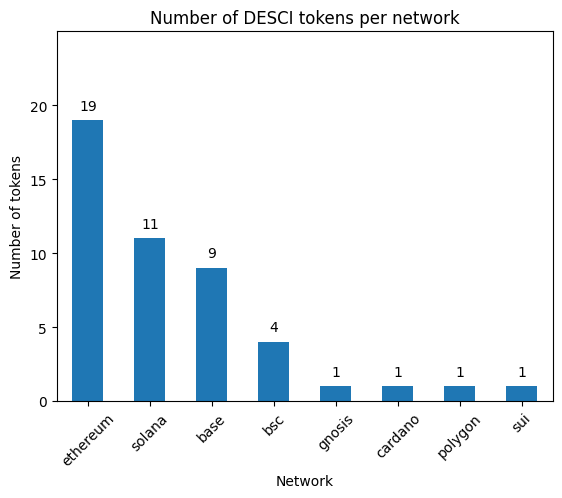

In [ ]:
# create a bar chart of the number of tokens per network
network_df["network"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 25)
# y axis labels every 5
plt.yticks(range(0, 25, 5))
# add annotation to the bars
for i, v in enumerate(network_df["network"].value_counts()):
    plt.text(i, v + 0.5, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per network")
plt.xlabel("Network")
plt.ylabel("Number of tokens")
plt.show()

## 3 Wallet Distribution Analysis
### 3.1 Data Preparation

In [ ]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and wallets
# tokens can have multiple wallets
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for wallet in token["wallets"]:
        clean_data.append({"name": name, "symbol": symbol, "wallet": wallet})

print(clean_data[:10])
# convert list of dictionaries to dataframe
wallet_df = pd.DataFrame(clean_data)
wallet_df.head()

# which token has multiple trust wallets?
wallet_df[wallet_df["wallet"] == "trust"].groupby("name").size().reset_index(
    name="count"
)[:10]

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'metamask'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'binance'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'trust'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'solfare'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'backpack'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'phantom'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'binance'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'wallet': 'jupiter'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'wallet': 'trust'}]


,name,count
0,Aimedis (new),1
1,Alchemist AI,1
2,AxonDAO Governance Token,1
3,Bio Protocol,1
4,Cerebrum DAO,1
5,Data Lake,1
6,DeSci AI Agent,1
7,DeSci Meme,1
8,Dynex,1
9,Galeon,1


### 3.2 Plot Visualization

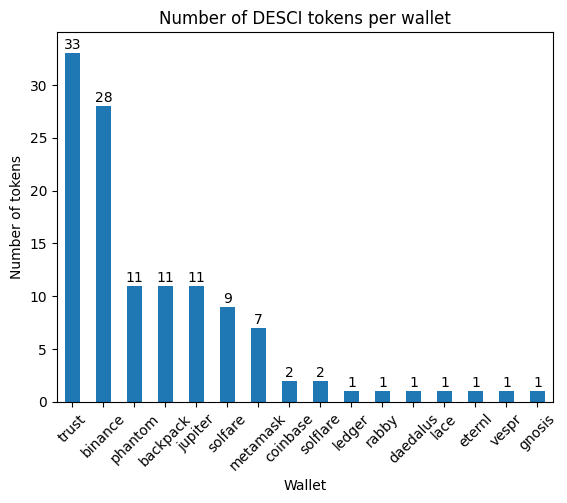

In [ ]:
# create a bar chart of the number of tokens per wallet
wallet_df["wallet"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 35)
# y axis labels every 5
plt.yticks(range(0, 35, 5))
# add annotation to the bars
for i, v in enumerate(wallet_df["wallet"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per wallet")
plt.xlabel("Wallet")
plt.ylabel("Number of tokens")
plt.show()

## 4. Auditor Distribution Analysis
### 4.1 Data Preparation

In [59]:
## create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and audits
# tokens can have multiple audits
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for audit in token["audits"]:
        clean_data.append({"name": name, "symbol": symbol, "audit": audit})
    if len(token["audits"]) < 1:
        clean_data.append({"name": name, "symbol": symbol, "audit": "none"})
print(clean_data[:10])
# convert list of dictionaries to dataframe
auditor_df = pd.DataFrame(clean_data)
auditor_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'audit': 'quantstamp'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'audit': 'none'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'audit': 'none'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'audit': 'certik'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'audit': 'none'}, {'name': 'Galeon', 'symbol': 'GALEON', 'audit': 'certik'}, {'name': 'Dynex', 'symbol': 'DNX', 'audit': 'cyberscope'}, {'name': 'ValleyDAO', 'symbol': 'GROW', 'audit': 'none'}, {'name': 'Rifampicin', 'symbol': 'RIF', 'audit': 'none'}, {'name': 'Rejuve.AI', 'symbol': 'RJV', 'audit': 'hacken'}]


,name,symbol,audit
0,OriginTrail,TRAC,quantstamp
1,Bio Protocol,BIO,none
2,Alchemist AI,ALCH,none
3,Pythia,PYTHIA,certik
4,ResearchCoin,RSC,none


### 4.2 Plot Visualization

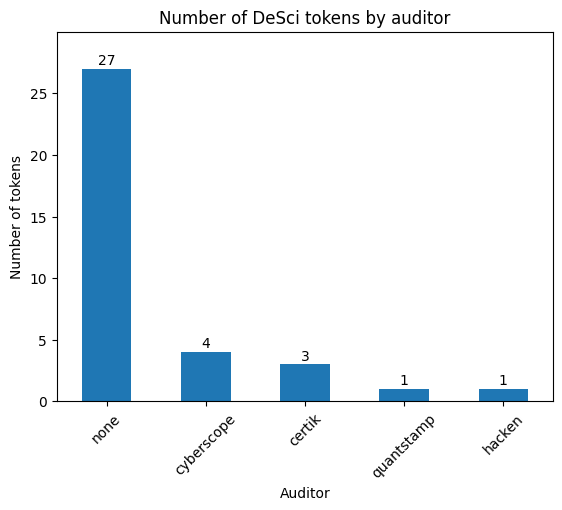

In [ ]:
# create a bar chart of the number of tokens per audit
auditor_df["audit"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 30)
# y axis labels every 5
plt.yticks(range(0, 30, 5))
# add annotation to the bars
for i, v in enumerate(auditor_df["audit"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DeSci tokens by auditor")
plt.xlabel("Auditor")
plt.ylabel("Number of tokens")
plt.show()

## 5. Social Media Distribution Analysis
### 5.1 Data Preparation

In [ ]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and social media platforms
# tokens can have multiple social media platforms
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for social in token["socials"]:
        clean_data.append({"name": name, "symbol": symbol, "social": social})

print(clean_data[:10])
# convert list of dictionaries to dataframe
social_df = pd.DataFrame(clean_data)
social_df.head()

[{'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'x'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'reddit'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'github'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'facebook'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'social': 'telegram'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'x'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'telegram'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'social': 'discord'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'social': 'x'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'social': 'telegram'}]


,name,symbol,social
0,OriginTrail,TRAC,x
1,OriginTrail,TRAC,reddit
2,OriginTrail,TRAC,github
3,OriginTrail,TRAC,facebook
4,OriginTrail,TRAC,telegram


### 5.2 Plot Visualization

Text(0.5, 0, 'Social Media Platform')

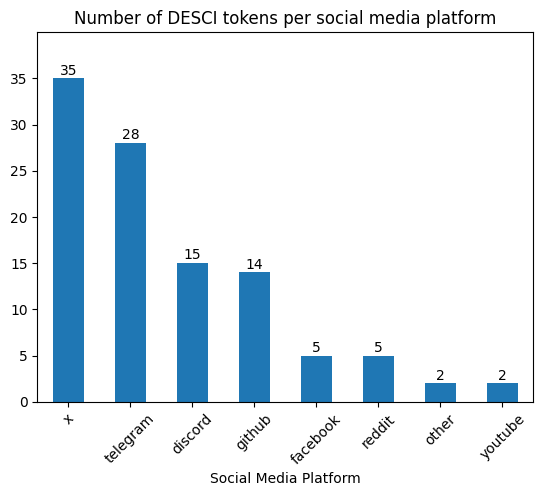

In [ ]:
# create a bar chart of the number of tokens per social media platform
# if the category count is 1, recategorize as "other"
social_df["social"] = social_df["social"].apply(
    lambda x: "other" if social_df["social"].value_counts()[x] == 1 else x
)
social_df["social"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 40)
# y axis labels every 5
plt.yticks(range(0, 40, 5))
# add annotation to the bars
for i, v in enumerate(social_df["social"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per social media platform")
plt.xlabel("Social Media Platform")

In [ ]:
# total number of unique token names
print("The total number of unique token names is: ", len(social_df["name"].unique()))

# which tokens have multiple X accounts?
# Group by 'name' and 'symbol', count the number of rows where 'social' is 'x'
x_accounts = (
    social_df[social_df["social"] == "x"]
    .groupby(["name", "symbol"])
    .size()
    .reset_index(name="count")
)
# Select only those with more than one account
multiple_x_accounts = x_accounts[x_accounts["count"] > 1]
print("Tokens with multiple X accounts:")
print(multiple_x_accounts)

The total number of unique token names is:  35
Tokens with multiple X accounts:
Empty DataFrame
Columns: [name, symbol, count]
Index: []


## 6. Explorers Distribution Analysis
### 6.1 Data Preparation

In [68]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and explorers
# tokens can have multiple explorers
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    name = token["name"]
    symbol = token["symbol"]
    for explorer in token["explorers"]:
        clean_data.append({"name": name, "symbol": symbol, "explorer": explorer})

# convert list of dictionaries to dataframe
explorer_df = pd.DataFrame(clean_data)
explorer_df.head()

,name,symbol,explorer
0,OriginTrail,TRAC,etherscan
1,OriginTrail,TRAC,nansen
2,OriginTrail,TRAC,ethplorer
3,Bio Protocol,BIO,etherscan
4,Bio Protocol,BIO,nansen


### 6.2 Plot Visualization

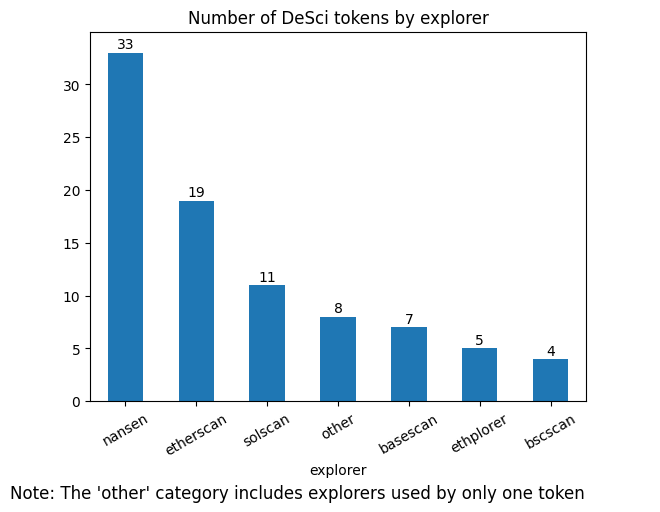

In [ ]:
# if the category count is 1, recategorize as "other"
explorer_df["explorer"] = explorer_df["explorer"].apply(
    lambda x: "other" if explorer_df["explorer"].value_counts()[x] == 1 else x
)
# create a bar chart of the number of tokens per explorer
explorer_df["explorer"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 35)
# y axis labels every 5
plt.yticks(range(0, 35, 5))
# add annotation to the bars
for i, v in enumerate(explorer_df["explorer"].value_counts()):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=30)
plt.title("Number of DeSci tokens by explorer")

# Add annotation note as a subplot below  the plot defining the "other" category
# Create a new subplot for the note
ax_note = plt.axes([0, 0, 1, 0.1])
ax_note.axis("off")
ax_note.text(
    0,
    -1,
    "Note: The 'other' category includes explorers used by only one token",
    ha="left",
    va="bottom",
    fontsize=12,
)

plt.show()